#### This script contains the following:

##### 1. Importing your libraries and data
##### 2. Subsetting, wrangling, and cleaning time-series data
##### 3. Time series analysis: decomposition
##### 4. Testing for stationarity
##### 5. Autocorrelation

### 1. Importing your libraries and data

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from datetime import datetime
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [9]:
# Define path
path = r'C:\Users\Daniella\ACH6'

In [11]:
# Import data set:
df_gun = pd.read_csv(os.path.join(path, 'Prepared Data', 'gun_violence_renamed.csv'))

### 2. Subsetting, wrangling, and cleaning time-series data

In [17]:
df_gun.shape

(239677, 24)

In [23]:
df_gun.dtypes

Unnamed: 0                           int64
Incident ID                          int64
Date                        datetime64[ns]
State                             category
City or County                    category
Address                             object
Nº Killed                            int64
Nº Injured                           int64
Congressional District             float64
Gun Stolen                        category
Gun Type                          category
Incident Characteristics          category
Latitude                           float64
Location Description              category
Longitude                          float64
Nº Guns Involved                   float64
Participant Age                     object
Participant Age Group             category
Participant Gender                category
Participant Relationship          category
Participant Status                category
Participant Iype                  category
State House District                object
State Senat

In [21]:
# Changing Data Types:
df_gun[['Date']] = df_gun[['Date']].astype('datetime64[ns]')

# Change these columns to 'category' data type
columns_to_category = ['State', 'City or County', 'Gun Stolen', 'Gun Type', 'Incident Characteristics', 'Location Description', 'Participant Age Group', 'Participant Gender', 'Participant Relationship', 'Participant Status', 'Participant Iype']

df_gun[columns_to_category] = df_gun[columns_to_category].astype('category')

In [27]:
df_gun.head(5)

,Incident ID,Date,State,City or County,Address,Nº Killed,Nº Injured,Congressional District,Gun Stolen,Gun Type,...,Longitude,Nº Guns Involved,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Iype,State House District,State Senate District
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Nan,Unknown,...,-79.8559,1.0,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unknown,Unknown
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,Nan,Unknown,...,-118.3330,1.0,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,Nan,Unknown,...,-104.8020,1.0,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Unknown,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [25]:
df_gun = df_gun.drop(columns=["Unnamed: 0"])

In [27]:
# Checking for missing values:
missing_values = df_gun.isnull().sum()
print(missing_values)

Incident ID                 0
Date                        0
State                       0
City or County              0
Address                     0
Nº Killed                   0
Nº Injured                  0
Congressional District      0
Gun Stolen                  0
Gun Type                    0
Incident Characteristics    0
Latitude                    0
Location Description        0
Longitude                   0
Nº Guns Involved            0
Participant Age             0
Participant Age Group       0
Participant Gender          0
Participant Relationship    0
Participant Status          0
Participant Iype            0
State House District        0
State Senate District       0
dtype: int64


In [29]:
# Set date as the index
df_gun.set_index('Date', inplace=True)

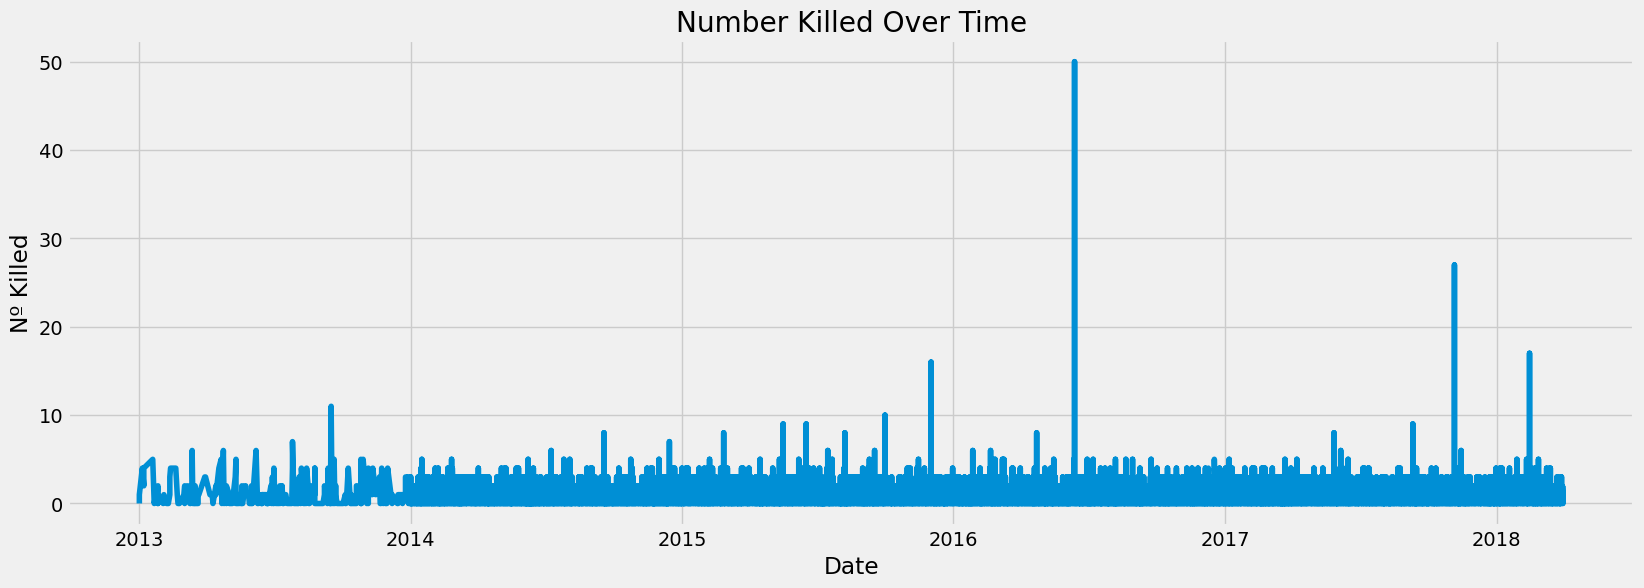

In [45]:
# Plot the number killed and year data
plt.figure(figsize=(18, 6))
plt.plot(df_gun['Nº Killed'])
plt.title('Number Killed Over Time')
plt.xlabel('Date')
plt.ylabel('Nº Killed')
plt.show()

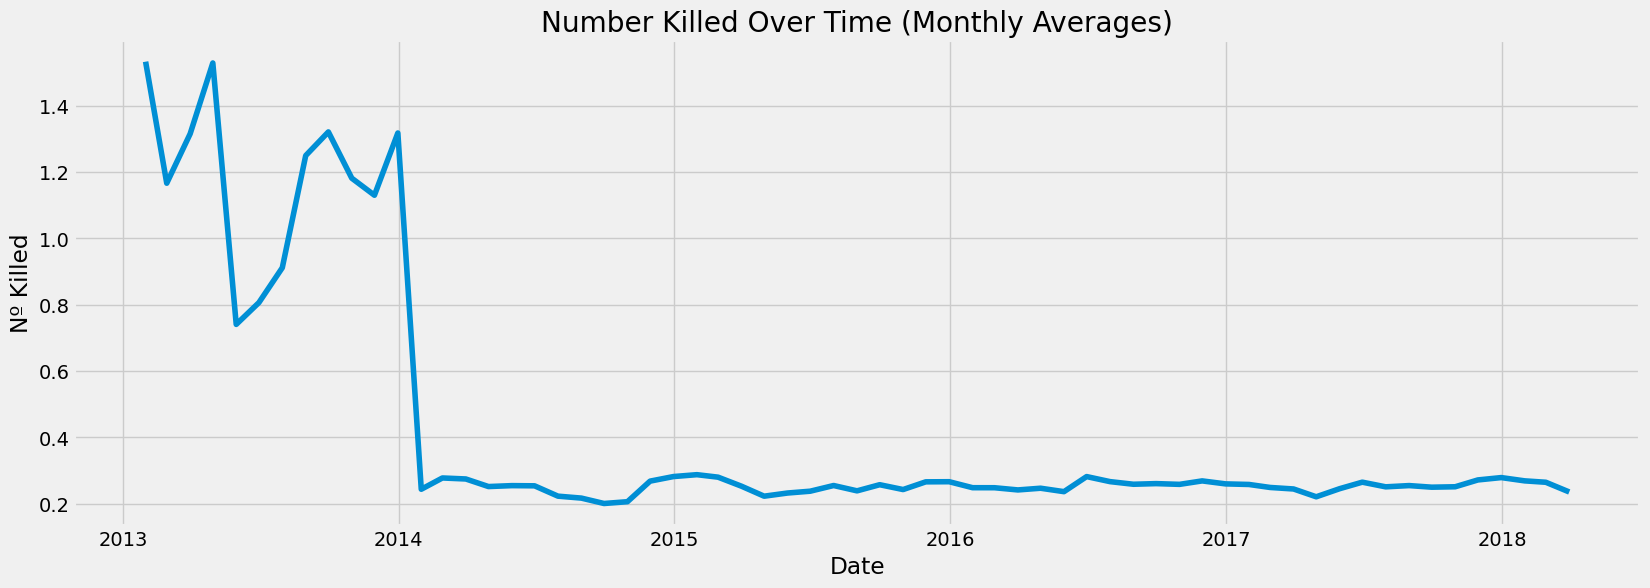

In [31]:
# Exclude non-numeric values:
numeric_columns = df_gun.select_dtypes(include=[int, float]).columns

# Change sample to monthly averages for numeric columns
monthly_avg = df_gun[numeric_columns].resample('M').mean()

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(monthly_avg['Nº Killed'])
plt.title('Number Killed Over Time (Monthly Averages)')
plt.xlabel('Date')
plt.ylabel('Nº Killed')
plt.show()

### 3. Time series analysis: decomposition

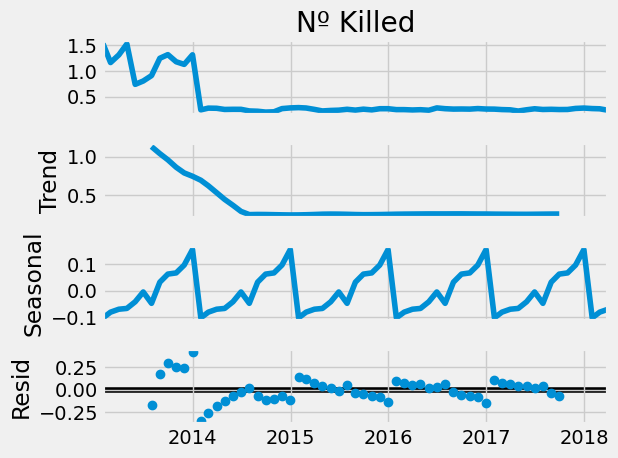

In [65]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(monthly_avg['Nº Killed'], model='additive')
decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [88]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
        # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
subset = df_gun['Nº Killed'][:1000]  # First 1000 rows
dickey_fuller(subset)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.308963
p-value                          0.014483
Number of Lags Used             19.000000
Number of Observations Used    980.000000
Critical Value (1%)             -3.437040
Critical Value (5%)             -2.864494
Critical Value (10%)            -2.568343
dtype: float64


#### The data can be treated as stationar since it seems to be stable over time.

### 5. Autocorrelation

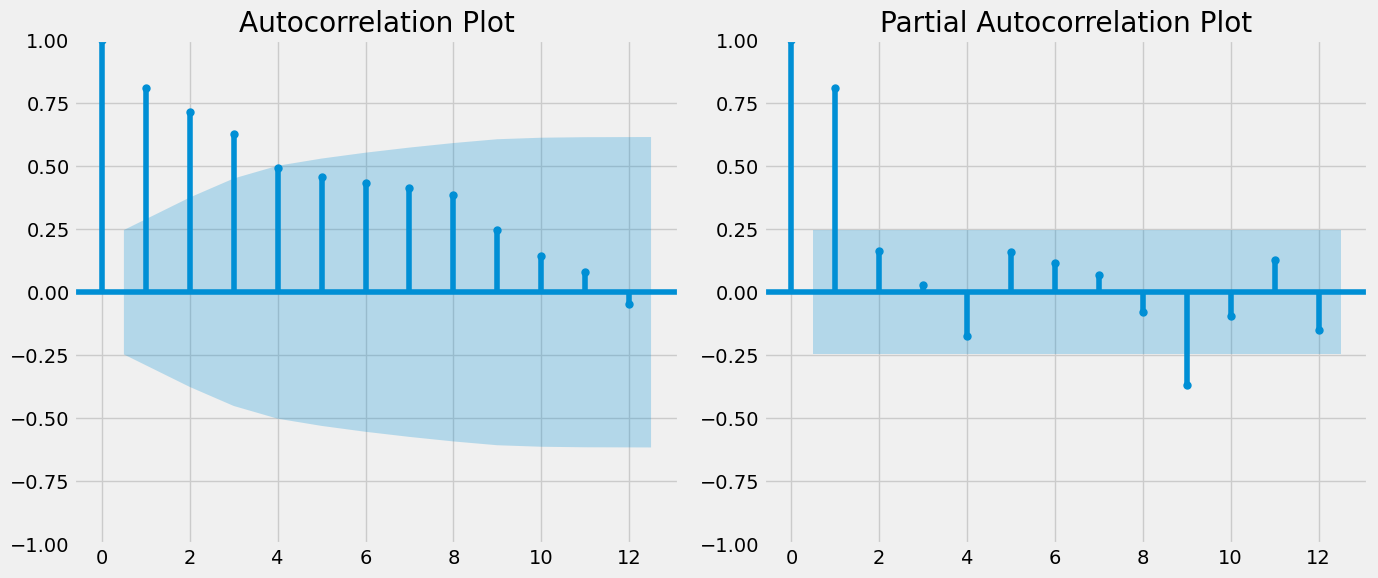

In [83]:
# Check out a plot of autocorrelations:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

monthly_avg = df_gun['Nº Killed'].resample('M').mean() 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the autocorrelation:
plot_acf(monthly_avg, lags=12, ax=ax1)
ax1.set_title('Autocorrelation Plot')

# Plot the partial autocorrelation:
plot_pacf(monthly_avg, lags=12, ax=ax2)
ax2.set_title('Partial Autocorrelation Plot')

plt.tight_layout()  
plt.show()